# Basic prime check function

In [3]:
def is_prime(x):
    if x < 2:
        return False, x
    v = 2
    while v * v <= x:
        if x % v == 0:
            return False, v
        v += 1
    return True, 1

In [5]:
print(is_prime(31))

(True, 1)


# Fast sieve function

In [31]:
# Fastest sieve I know
# Taken from https://www.geeksforgeeks.org/sieve-of-atkin/

def SieveOfAtkin(limit):
    # 2 and 3 are known
    # to be prime
    ans = []
    if limit > 2:
        ans.append(2)
    if limit > 3:
        ans.append(3)
 
    # Initialise the sieve
    # array with False values
    sieve = [False] * (limit + 1)
    for i in range(0, limit + 1):
        sieve[i] = False
 
    '''Mark sieve[n] is True if
    one of the following is True:
    a) n = (4*x*x)+(y*y) has odd
    number of solutions, i.e.,
    there exist odd number of
    distinct pairs (x, y) that
    satisfy the equation and
    n % 12 = 1 or n % 12 = 5.
    b) n = (3*x*x)+(y*y) has
    odd number of solutions
    and n % 12 = 7
    c) n = (3*x*x)-(y*y) has
    odd number of solutions,
    x > y and n % 12 = 11 '''
    x = 1
    while x * x <= limit:
        y = 1
        while y * y <= limit:
 
            # Main part of
            # Sieve of Atkin
            n = (4 * x * x) + (y * y)
            if (n <= limit and (n % 12 == 1 or
                                n % 12 == 5)):
                sieve[n] ^= True
 
            n = (3 * x * x) + (y * y)
            if n <= limit and n % 12 == 7:
                sieve[n] ^= True
 
            n = (3 * x * x) - (y * y)
            if (x > y and n <= limit and
                    n % 12 == 11):
                sieve[n] ^= True
            y += 1
        x += 1
 
    # Mark all multiples of
    # squares as non-prime
    r = 5
    while r * r <= limit:
        if sieve[r]:
            for i in range(r * r, limit+1, r * r):
                sieve[i] = False
 
        r += 1
    
    for a in range(5, limit+1):
        if sieve[a]:
            ans.append(a)
    
    return ans

             

In [47]:
limit = 1e6+1
primes_lst = SieveOfAtkin(int(limit))[1:]
primes = {prime_i: True for prime_i in primes_lst}
print(primes_lst[:100])

[3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547]


# The number of primes needed to fulfill the golbach conjecture up to a certain even number
It takes into consideration the sum:
- 3 + 3
- 5 + 3
- 5 + 5
- 7 + 3
- 7 + 5
- 7 + 7
- 11 + 3
- 11 + 5
- 11 + 7
- 11 + 11
- ...

The function returns the prime $p_i$ for an input $2k$ if $p_i$ is the minimum prime such that all of the sums using $p_i$ or a smaller prime fulfills all even numbers up to $2k$.

In [43]:
def get_number_of_primes_to_fulfill(limit):
    even_numbers = {2 * v:True for v in range(3,limit//2+1)}

    repetitions = 0

    for idx, prime_1 in enumerate(primes_lst):
        for _, prime_2 in enumerate(primes_lst[:idx+1]):
            sum = prime_1 + prime_2
            assert sum % 2 == 0
            if sum in even_numbers:
                del even_numbers[sum]
                if len(even_numbers) == 0:
                    return idx + 1, repetitions
            else:
                repetitions += 1
    
    if len(even_numbers) > 0:
        raise AssertionError("Don't have enough primes")
    
    return idx, repetitions
                


In [44]:
get_number_of_primes_to_fulfill(10)

(2, 0)

In [64]:
x_max = 4*1e4

x = list(range(10,int(x_max)+1,2))
number_of_primes_necessary = []
repetitions = []

for xi in x:
    res, rep = get_number_of_primes_to_fulfill(xi)
    number_of_primes_necessary.append(res)
    repetitions.append(rep)


/var/folders/0k/cdzy3_mj1jj_23zzmclcqhlw0000gn/T/ipykernel_44718/329598998.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  y_test = [xi/(math.log10(xi)**2) for xi in x_test]


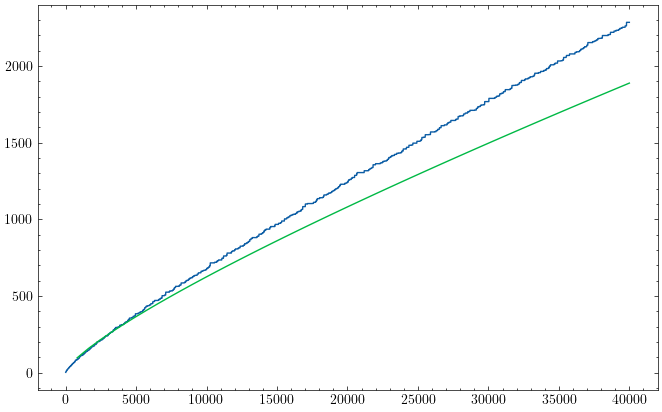

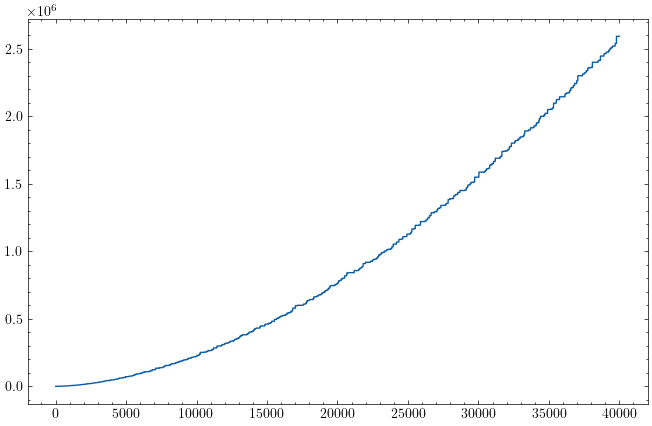

In [66]:
import matplotlib.pyplot as plt
import scienceplots
import numpy as np
import math

with plt.style.context(["science"]):

    fig, ax = plt.subplots(figsize = (8,5))

    x_test = np.linspace(1,x_max)
    y_test = [xi/(math.log10(xi)**2) for xi in x_test]

    plt.plot(x, number_of_primes_necessary)
    plt.plot(x_test, y_test)

    plt.show()

with plt.style.context(["science"]):

    fig, ax = plt.subplots(figsize = (8,5))

    plt.plot(x, repetitions)

    plt.show()